In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [5]:
df_train = pd.read_csv('mitbih_train.csv',header=None)

df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_train.shape

(87554, 188)

In [7]:
df_train.isna().sum().sum()

0

In [8]:
df_train.rename(columns={187: 'target'}, inplace=True)

df_train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,target
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
id_to_label = {
    0: "Normal Sinus Rhythm",
    1: "Supraventricular premature beat",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Unknown Beat"
}
df_train['label'] = df_train.iloc[:, -1].map(id_to_label)
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 189 entries, 0 to label
dtypes: float64(188), object(1)
memory usage: 126.2+ MB
None


In [10]:
df_train.iloc[:,-2:].head()

,target,label
0,0.0,Normal Sinus Rhythm
1,0.0,Normal Sinus Rhythm
2,0.0,Normal Sinus Rhythm
3,0.0,Normal Sinus Rhythm
4,0.0,Normal Sinus Rhythm


In [8]:
# #visualize the count
# print('Target Balance information ')
# print(df['Exited'].value_counts(), '\n')
# sns.countplot(df.Exited,label="count")
# sns.set_theme()
# plt.text(x = -0.05 , y = df['Exited'].value_counts()[0]+2, s=str(round(df['Exited'].value_counts()[0]*100/len(df), 2))+'%' )
# plt.text(x = 0.9 , y = df['Exited'].value_counts()[1]+2, s=str(round(df['Exited'].value_counts()[1]*100/len(df), 2))+'%' )
# plt.show()

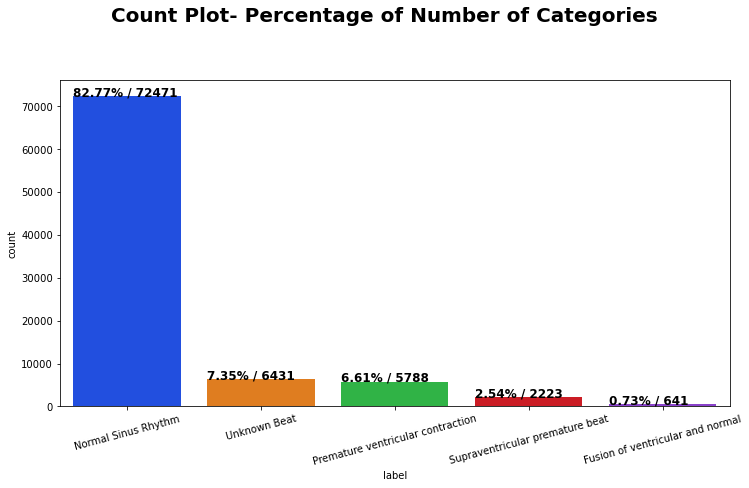

In [14]:
percentages = [count / df_train.shape[0] * 100 for count in df_train['label'].value_counts()]

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(
    x=df_train['label'],
    ax=ax,
    palette="bright",
    order=df_train['label'].value_counts().index
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15);

for percentage, count, p in zip(
    percentages,
    df_train['label'].value_counts(sort=True).values,
    ax.patches):
    
    percentage = f'{np.round(percentage, 2)}%'
    x = p.get_x() + p.get_width() / 2 - 0.4
    y = p.get_y() + p.get_height()
    ax.annotate(str(percentage)+" / "+str(count), (x, y), fontsize=12, fontweight='bold')
    
plt.suptitle("Count Plot- Percentage of Number of Categories", fontsize=20, y=1.05, weight="bold") 

plt.savefig('data_dist.png', facecolor='w', edgecolor='w', format='png',
        transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.savefig('data_dist.svg', facecolor='w', edgecolor='w', format='svg',
        transparent=False, bbox_inches='tight', pad_inches=0.1)

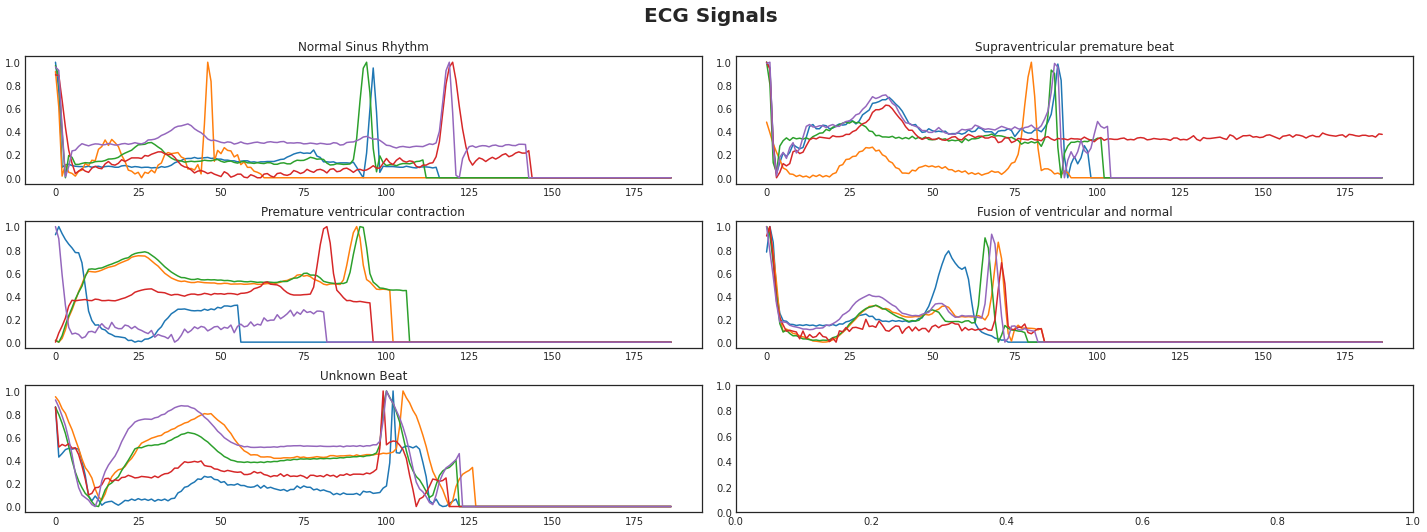

In [15]:
N = 5
samples = [df_train.loc[df_train['target'] == cls].sample(N) for cls in range(N)]
titles = [id_to_label[cls] for cls in range(5)]

with plt.style.context("seaborn-white"):
    fig, axs = plt.subplots(3, 2, figsize=(20, 7))
    for i in range(5):
        ax = axs.flat[i]
        ax.plot(samples[i].values[:,:-2].transpose())
        ax.set_title(titles[i])
        #plt.ylabel("Amplitude")

    plt.tight_layout()
    plt.suptitle("ECG Signals", fontsize=20, y=1.05, weight="bold")
    plt.savefig(f"signals_per_class.svg",
                    format="svg",bbox_inches='tight', pad_inches=0.2)
        
    plt.savefig(f"signals_per_class.png", 
                    format="png",bbox_inches='tight', pad_inches=0.2) 

In [16]:
#Standard Scaling 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_train= df_train.drop(['target', 'label'], axis = 1)
y_train = df_train.target
std = StandardScaler()
X_scaled = std.fit_transform(X_train)
X_train = pd.DataFrame(X_scaled, columns= X_train.columns)
X_train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.363548,0.758797,1.132406,0.12565,-0.263843,-0.111820,-0.301699,-0.654419,-0.814241,-0.877525,...,-0.11733,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794
1,0.289547,0.473768,0.165269,-0.10887,-0.604947,-0.494702,-0.594425,-0.640117,-0.725460,-0.677940,...,-0.11733,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794


In [20]:
df_test = pd.read_csv('mitbih_test.csv',header=None)

df_test.head(1)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.0,0.758264,0.11157,0.0,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df_test.shape

(21892, 188)

In [22]:
df_test.rename(columns={187: 'target'}, inplace=True)

In [23]:
df_test.target.astype('int').unique()

array([0, 1, 2, 3, 4])

In [24]:
X_test = df_test.drop(['target'], axis =1)
y_test = df_test['target']

X_test_scaled = std.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns= X_test.columns)
X_test.head(2)

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.450172,-0.016637,-1.378397,-1.061762,-0.681382,-0.762984,-0.779404,-0.859583,-0.881855,-0.965181,...,-0.111845,-0.106373,-0.102577,-0.099859,-0.096178,-0.094419,-0.091705,-0.088195,-0.084461,-0.083528
1,0.059751,0.100527,0.457235,0.675789,0.926295,0.780719,0.722304,0.605774,0.581996,0.625928,...,-0.111845,-0.106373,-0.102577,-0.099859,-0.096178,-0.094419,-0.091705,-0.088195,-0.084461,-0.083528


In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [26]:
# from sklexplained_variance_earn.preprocessing import PCA
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [27]:
pca.components_.T.shape

(187, 41)

In [28]:
var = pca.explained_variance_ratio_
cumsum = np.cumsum(var)

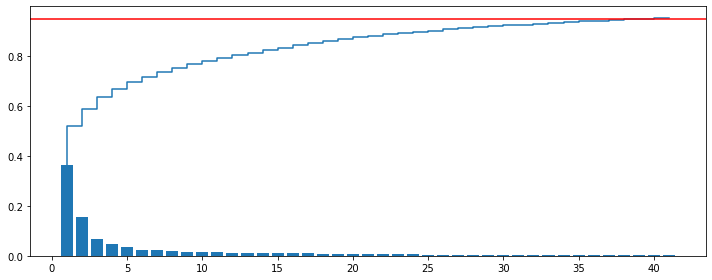

In [29]:
plt.rcParams['figure.figsize'] = (10, 4)
plt.step(range(1, 42), cumsum)
plt.bar(range(1,42), var)
plt.axhline(y = .95, c = 'red')
plt.tight_layout()
plt.show()

In [30]:
pca1 = PCA(n_components= 41)
X_train_pca1 =pca1.fit_transform(X_train)
X_test_pca1 =pca1.fit_transform(X_test)

In [31]:
#building model DecisionTree
svd_dt = DecisionTreeClassifier(criterion='entropy', random_state=100)
svd_dt = svd_dt.fit(X_train_pca1, y_train)

In [32]:
y_pred_pca1 = svd_dt.predict(X_test_pca1).astype('int')

y_pred_pca1[0:50]

array([0, 2, 1, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 0])

In [33]:
accuracy_score(y_test, y_pred_pca1)

0.8287959071807053

In [34]:
print(classification_report(y_test, y_pred_pca1))

              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91     18118
         1.0       0.15      0.30      0.20       556
         2.0       0.42      0.55      0.48      1448
         3.0       0.13      0.24      0.17       162
         4.0       0.69      0.76      0.72      1608

    accuracy                           0.83     21892
   macro avg       0.47      0.54      0.50     21892
weighted avg       0.86      0.83      0.84     21892



In [35]:
confusion_matrix(y_test, y_pred_pca1)

array([[15932,   854,   807,   205,   320],
       [  357,   165,    29,     3,     2],
       [  354,    42,   791,    48,   213],
       [   90,     0,    33,    39,     0],
       [  170,    15,   206,     0,  1217]], dtype=int64)

In [36]:
from sklearn.metrics import plot_confusion_matrix

from warnings import filterwarnings 
filterwarnings('ignore')

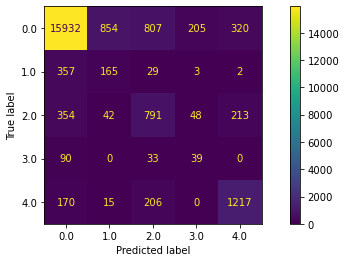

In [37]:
plot_confusion_matrix(estimator= svd_dt, X = X_test_pca1.copy(), y_true=y_test.copy())
plt.show()

### Conclusion:

#### ***Data is imbalanced across all the sub-categories, this may require Upsamling or Downsampling to synthesise the data

## ECG_Classification_SMOTE

In [63]:
df1=pd.read_csv('mitbih_train.csv',header=None)
df2=pd.read_csv('mitbih_test.csv',header=None)

In [64]:
# concat the two dataframes
df=pd.concat([df1,df2],ignore_index=True,sort=False)

In [65]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
df.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
109444,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109445,0.973970,0.913232,0.865510,0.823210,0.746204,0.642082,0.547722,0.426247,0.325380,0.279826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [68]:
df[187].value_counts()

0.0    90589
4.0     8039
2.0     7236
1.0     2779
3.0      803
Name: 187, dtype: int64

In [69]:
# Let's convert the target values to integers
df[187]=df[187].astype(int)

In [70]:
df[187].value_counts()

0    90589
4     8039
2     7236
1     2779
3      803
Name: 187, dtype: int64

### Visulaization

In [71]:
import random

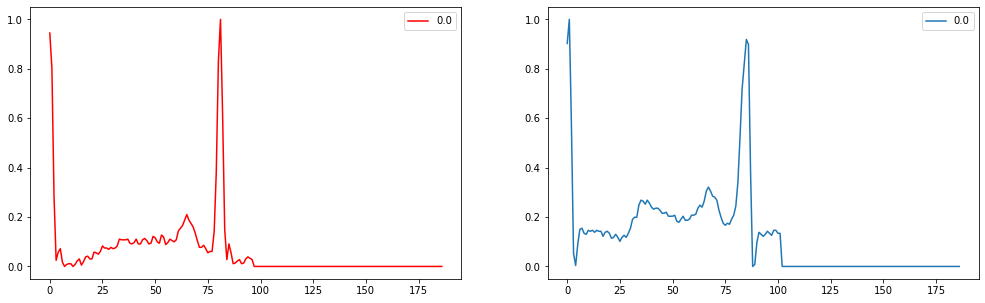

In [72]:
plt.figure(figsize=(17,5))
plt.subplot(121)
test_row_1=np.array(df.iloc[np.random.randint(0,len(df))])
plt.plot(test_row_1[:-1],label=test_row_1[-1],color='r')
plt.legend()

plt.subplot(122)
test_row_2=np.array(df.iloc[np.random.randint(0,len(df))])
plt.plot(test_row_2[:-1],label=test_row_2[-1])
plt.legend()

In [73]:
print(df[187].value_counts().sort_values(ascending=False))

0    90589
4     8039
2     7236
1     2779
3      803
Name: 187, dtype: int64


Normal beat ('N'): 0 Supraventricular ectopic beats ('S'): 1 Ventricular ectopic beats ('V'): 2 Fusion Beats ('F'): 3 Unknown Beats ('Q'): 4

([<matplotlib.patches.Wedge at 0x23a26c0e460>,
 [Text(-0.9427544126347679, 0.5667575473319026, 'Normal Sinus Rhythm'),
  Text(0.7244876615439377, -0.8277183266489856, 'Supraventricular premature beat'),
  Text(1.0073606227948213, -0.4418422519886819, '- Premature ventricular contraction'),
  Text(1.0912977987617831, -0.13809096428690254, 'Fusion of ventricular and normal beat'),
  Text(1.0997078011098815, -0.02535255762382736, '– Unknown Beat')],
 [Text(-0.5142296796189643, 0.30914048036285596, '82.8%'),
  Text(0.39517508811487506, -0.4514827236267194, '7.3%'),
  Text(0.549469430615357, -0.24100486472109917, '6.6%'),
  Text(0.5952533447791544, -0.07532234415649228, '2.5%'),
  Text(0.599840618787208, -0.013828667794814923, '0.7%')])

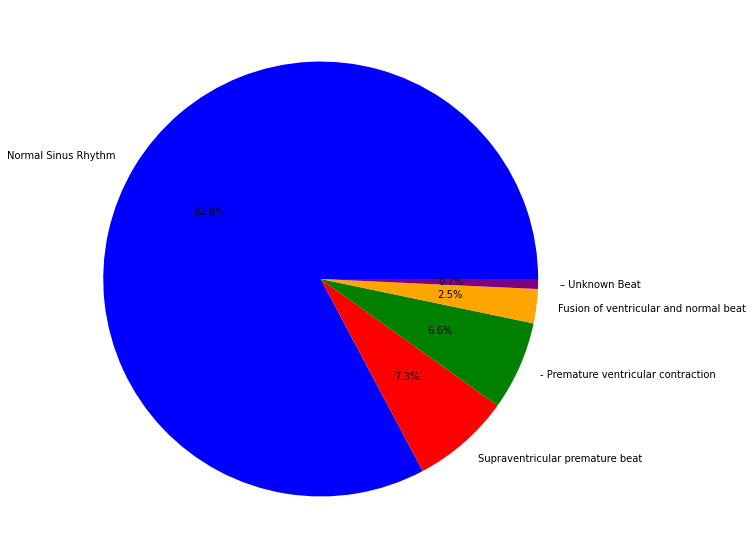

In [74]:
# plot number of records in each category
plt.figure(figsize=(10,10))
plt.pie(df[187].value_counts(), labels = ["Normal Sinus Rhythm","Supraventricular premature beat","- Premature ventricular contraction","Fusion of ventricular and normal beat","– Unknown Beat"],colors= ['blue','red','green','orange','purple'],autopct='%2.1f%%')

#### Model imbalanced dataset with Usual Logistic Classification Models

In [75]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [76]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)

In [78]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(82084, 187)
(82084,)
(27362, 187)
(27362,)


In [79]:
log_reg=LogisticRegression()
rf=RandomForestClassifier()

In [80]:
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
print(accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

0.9129449601637307

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     22592
           1       0.84      0.39      0.54       701
           2       0.66      0.33      0.44      1789
           3       0.60      0.20      0.30       194
           4       0.96      0.87      0.91      2086

    accuracy                           0.91     27362
   macro avg       0.80      0.55      0.63     27362
weighted avg       0.90      0.91      0.90     27362



In [81]:
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

0.97628097361304

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     22592
           1       0.98      0.64      0.77       701
           2       0.98      0.90      0.93      1789
           3       0.92      0.59      0.72       194
           4       0.99      0.95      0.97      2086

    accuracy                           0.98     27362
   macro avg       0.97      0.82      0.88     27362
weighted avg       0.98      0.98      0.97     27362



### Dealing with Imbalanced dataset

In [82]:
# SMOTE: Synthetic Minority Over-sampling Technique. used for oversampling

import imblearn
from imblearn.over_sampling import SMOTE

In [83]:
y_train.value_counts()

0    67997
4     5953
2     5447
1     2078
3      609
Name: 187, dtype: int64

In [84]:
# Note : Oversampling to be done only on train data, never on test data
smote=SMOTE()
X_oversampled,y_oversampled=smote.fit_resample(X_train,y_train)

In [85]:
y_oversampled.value_counts()

0    67997
4    67997
2    67997
1    67997
3    67997
Name: 187, dtype: int64

In [92]:
print("ALL Train data")
print("Type\tCount")
print((df1[187]).value_counts())
print("-------------------------")
print("ALL Test data")
print("Type\tCount")
print((df2[187]).value_counts())

print("ALL Train-Test data")
print("Type\tCount")
print((df[187]).value_counts())
print("-------------------------")
print("ALL Balanced Test data")
print("Type\tCount")
print((y_oversampled).value_counts())

ALL Train data
Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
-------------------------
ALL Test data
Type	Count
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64
ALL Train-Test data
Type	Count
0    90589
4     8039
2     7236
1     2779
3      803
Name: 187, dtype: int64
-------------------------
ALL Balanced Test data
Type	Count
0    67997
4    67997
2    67997
1    67997
3    67997
Name: 187, dtype: int64


### Model training after SMOTE

In [86]:
log_reg_resampled=LogisticRegression()
rf_resampled=RandomForestClassifier()

In [87]:
log_reg_resampled.fit(X_oversampled,y_oversampled)
y_pred=log_reg_resampled.predict(X_test)
print(accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

0.6485637014838097

              precision    recall  f1-score   support

           0       0.98      0.61      0.75     22592
           1       0.14      0.71      0.23       701
           2       0.27      0.74      0.40      1789
           3       0.08      0.87      0.15       194
           4       0.72      0.92      0.81      2086

    accuracy                           0.65     27362
   macro avg       0.44      0.77      0.47     27362
weighted avg       0.88      0.65      0.72     27362



In [88]:
rf_resampled.fit(X_oversampled,y_oversampled)
y_pred=rf_resampled.predict(X_test)
print(accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

0.982091952342665

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22592
           1       0.88      0.80      0.84       701
           2       0.96      0.94      0.95      1789
           3       0.83      0.78      0.80       194
           4       0.99      0.97      0.98      2086

    accuracy                           0.98     27362
   macro avg       0.93      0.90      0.91     27362
weighted avg       0.98      0.98      0.98     27362



### Conclusion:

Using SMOTE oversampling, the performance of Logistic Regression declined, but that of Random Forest classifier improved, specially for the minority classes.

### Deep Learning CNN Classical Model

In [117]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [118]:
train_df = pd.read_csv('mitbih_train.csv',header=None)
test_df = pd.read_csv('mitbih_test.csv',header=None)

In [119]:
train_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
test_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
test_df[187].unique()

array([0., 1., 2., 3., 4.])

In [122]:
clases = train_df[187].value_counts()
print(clases)

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


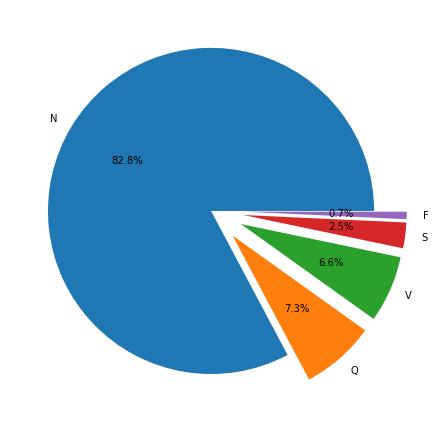

In [123]:
plt.figure(figsize=(7.5,7.5))
explode = (0, 0.2, 0.2, 0.2, 0.2)
plt.pie(clases, labels=['N','Q','V','S','F'], autopct='%1.1f%%', explode=explode)
plt.show()

In [124]:
df_0 = train_df[train_df[187]==0.0].sample(n=16000, random_state=1)
df_1 = train_df[train_df[187]==1.0]
df_2 = train_df[train_df[187]==2.0]
df_3 = train_df[train_df[187]==3.0]
df_4 = train_df[train_df[187]==4.0]
# upsample
df_1_up=resample(df_1, replace=True, n_samples=16000, random_state=1)
df_2_up=resample(df_2, replace=True, n_samples=16000, random_state=1)
df_3_up=resample(df_3, replace=True, n_samples=16000, random_state=1)
df_4_up=resample(df_4, replace=True, n_samples=16000, random_state=1)

train_df = pd.concat([df_0, df_1_up, df_2_up, df_3_up, df_4_up])

In [125]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
65728,1.000000,0.918864,0.567951,0.243408,0.279919,0.310345,0.283976,0.283976,0.277890,0.267748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33224,0.199288,0.074733,0.270463,0.427046,0.551601,0.569395,0.558719,0.565836,0.594306,0.597865,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46733,1.000000,0.929448,0.328221,0.070552,0.205521,0.294479,0.309816,0.319018,0.322086,0.346626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49665,0.000000,0.059006,0.236025,0.347826,0.434783,0.431677,0.422360,0.437888,0.456522,0.453416,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30911,0.975659,0.872211,0.531440,0.255578,0.184584,0.162272,0.109533,0.113590,0.113590,0.107505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85165,1.000000,0.567164,0.570895,0.585821,0.585821,0.563433,0.574627,0.522388,0.402985,0.298507,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
86756,0.664697,0.589365,0.483013,0.392910,0.273264,0.162482,0.087149,0.031019,0.000000,0.026588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
83845,0.945148,0.518987,0.556962,0.556962,0.544304,0.510549,0.527426,0.459916,0.337553,0.206751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
83949,1.000000,0.505618,0.535581,0.520599,0.528090,0.524345,0.531835,0.479401,0.404494,0.303371,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [126]:
clases = train_df[187].value_counts()
print(clases)

0.0    16000
1.0    16000
2.0    16000
3.0    16000
4.0    16000
Name: 187, dtype: int64


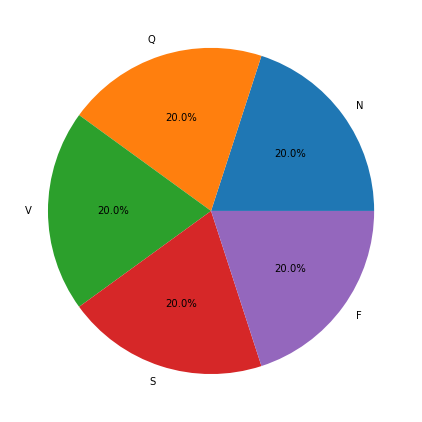

In [127]:
plt.figure(figsize=(7.5,7.5))
plt.pie(clases, labels=['N','Q','V','S','F'], autopct='%1.1f%%')
plt.show()

Text(0.5, 1.0, 'Unknown beats')

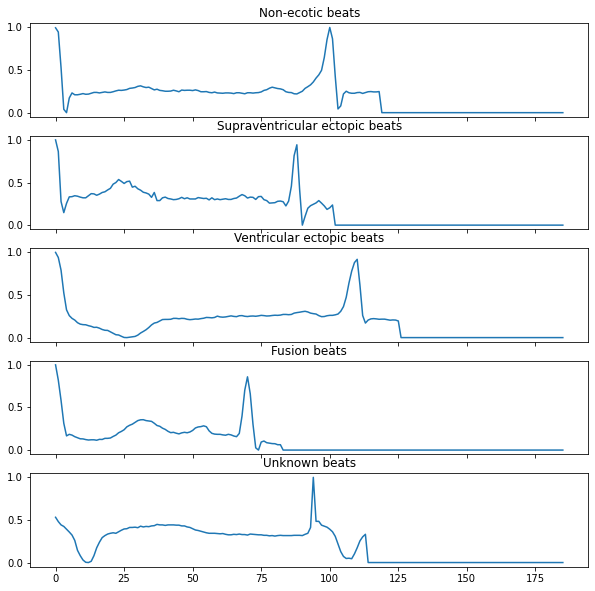

In [128]:
sample_n=df_0.sample(1)
sample_s=df_1.sample(1)
sample_v=df_2.sample(1)
sample_f=df_3.sample(1)
sample_q=df_4.sample(1)

fig, ax = plt.subplots(5, sharex=True, sharey=True)
fig.set_size_inches(10,10)
ax[0].plot(sample_n.iloc[0,:186])
ax[0].set_title("Non-ecotic beats")
ax[1].plot(sample_s.iloc[0,:186])
ax[1].set_title("Supraventricular ectopic beats")
ax[2].plot(sample_v.iloc[0,:186])
ax[2].set_title("Ventricular ectopic beats")
ax[3].plot(sample_f.iloc[0,:186])
ax[3].set_title("Fusion beats")
ax[4].plot(sample_q.iloc[0,:186])
ax[4].set_title("Unknown beats")

In [129]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(train_df[187])
y_test = to_categorical(test_df[187])

x_train = train_df.iloc[:,:186].values
x_test = test_df.iloc[:,:186].values
x_train = x_train.reshape(len(x_train), x_train.shape[1],1)
x_test = x_test.reshape(len(x_test), x_test.shape[1],1)

In [130]:
cnn = Sequential()
cnn.add(Conv1D(128,3,input_shape=(x_train.shape[1],1), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(64,3, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(64,2, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(64,2, activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(5, activation='softmax'))

In [131]:
cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
callbacks = [EarlyStopping(monitor='val_loss', patience=8), ModelCheckpoint(filepath='./best_weights.h5', monitor='val_loss', save_best_only=True)]
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 184, 128)          512       
                                                                 
 batch_normalization_6 (Batc  (None, 184, 128)         512       
 hNormalization)                                                 
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 92, 128)          0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 90, 64)            24640     
                                                                 
 batch_normalization_7 (Batc  (None, 90, 64)           256       
 hNormalization)                                                 
                                                      

In [132]:
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight, resample
y_train = to_categorical(train_df[187])
y_test = to_categorical(test_df[187])

x_train = train_df.iloc[:,:186].values
x_test = test_df.iloc[:,:186].values
x_train = x_train.reshape(len(x_train), x_train.shape[1],1)
x_test = x_test.reshape(len(x_test), x_test.shape[1],1)

In [134]:
cnn.fit(x_train, y_train,steps_per_epoch=10000, epochs=100, callbacks=callbacks, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/100
10000/10000 [==============================] - 492s 49ms/step - loss: 0.0548 - accuracy: 0.9812 - val_loss: 0.1273 - val_accuracy: 0.9612
Epoch 2/100
10000/10000 [==============================] - 486s 49ms/step - loss: 0.0383 - accuracy: 0.9871 - val_loss: 0.1436 - val_accuracy: 0.9644
Epoch 3/100
10000/10000 [==============================] - 498s 50ms/step - loss: 0.0296 - accuracy: 0.9903 - val_loss: 0.1314 - val_accuracy: 0.9715
Epoch 4/100
10000/10000 [==============================] - 503s 50ms/step - loss: 0.0254 - accuracy: 0.9918 - val_loss: 0.1239 - val_accuracy: 0.9781
Epoch 5/100
10000/10000 [==============================] - 501s 50ms/step - loss: 0.0218 - accuracy: 0.9931 - val_loss: 0.1213 - val_accuracy: 0.9773
Epoch 6/100
10000/10000 [==============================] - 521s 52ms/step - loss: 0.0191 - accuracy: 0.9939 - val_loss: 0.1448 - val_accuracy: 0.9746
Epoch 7/100
10000/10000 [==============================] - 529s 53ms/step - loss: 0.0169 - accuracy:

In [135]:
scores = cnn.evaluate(x_test,y_test, verbose=1)
y_predict = cnn.predict(x_test)

685/685 [==============================] - 8s 12ms/step - loss: 0.2019 - accuracy: 0.9733


In [136]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

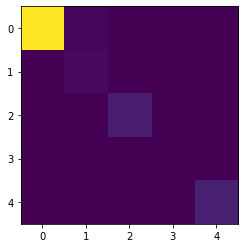

In [137]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test.argmax(axis=1),y_predict.argmax(axis=1))
plt.imshow(cf_matrix)

Normalized confusion matrix


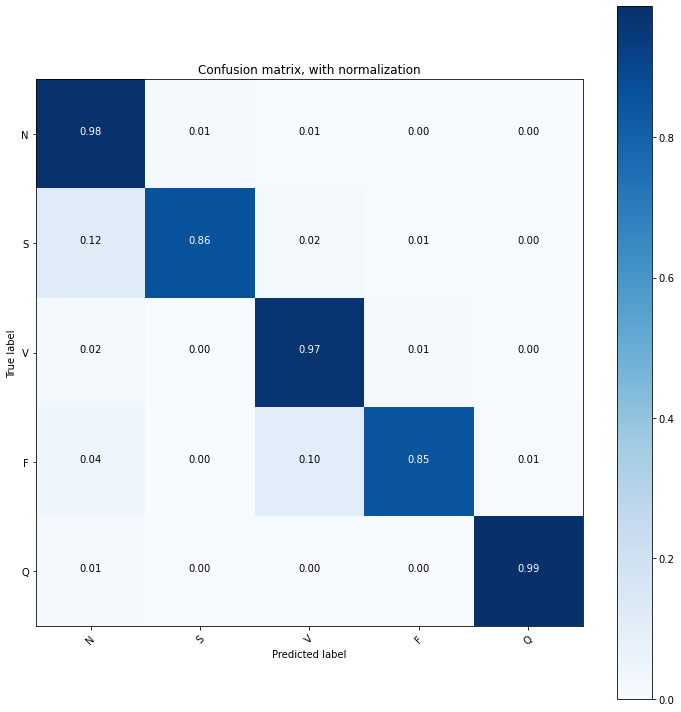

In [138]:
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,title='Confusion matrix, with normalization')
plt.show()

In [139]:
cnn.save('./ecg_model2.h5')
cnn.save_weights('./ecg_weights2.h5')

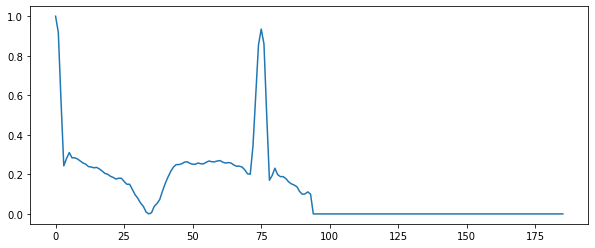

In [140]:
plt.plot(train_df.iloc[0,:186])
plt.show()

### Transfer Learning

In [141]:
from keras.models import load_model
cnn_transfer = load_model('./ecg_model2.h5')
cnn_transfer.load_weights('./ecg_weights2.h5')
cnn_transfer.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 184, 128)          512       
                                                                 
 batch_normalization_6 (Batc  (None, 184, 128)         512       
 hNormalization)                                                 
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 92, 128)          0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 90, 64)            24640     
                                                                 
 batch_normalization_7 (Batc  (None, 90, 64)           256       
 hNormalization)                                                 
                                                      

In [142]:
cnn_transfer.trainable = False
cnn_transfer.pop()
cnn_transfer.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 184, 128)          512       
                                                                 
 batch_normalization_6 (Batc  (None, 184, 128)         512       
 hNormalization)                                                 
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 92, 128)          0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 90, 64)            24640     
                                                                 
 batch_normalization_7 (Batc  (None, 90, 64)           256       
 hNormalization)                                                 
                                                      

In [143]:
cnn2 = Sequential()
cnn2.add(cnn_transfer)
cnn2.add(Dense(64, activation='relu'))
cnn2.add(Dropout(0.25))
cnn2.add(Dense(5, activation='softmax'))
cnn2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 64)                223104    
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 5)                 325       
                                                                 
Total params: 227,589
Trainable params: 4,485
Non-trainable params: 223,104
_________________________________________________________________


In [144]:
cnn2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
callbacks2 = [EarlyStopping(monitor='val_loss', patience=8), ModelCheckpoint(filepath='./best_noise_weights.h5', monitor='val_loss', save_best_only=True)]

In [145]:
cnn2.fit(x_train, y_train,steps_per_epoch=10000, epochs=100, callbacks=callbacks2, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/100
10000/10000 [==============================] - 127s 13ms/step - loss: 0.0581 - accuracy: 0.9931 - val_loss: 0.1900 - val_accuracy: 0.9757
Epoch 2/100
10000/10000 [==============================] - 131s 13ms/step - loss: 0.0125 - accuracy: 0.9963 - val_loss: 0.1832 - val_accuracy: 0.9745
Epoch 3/100
10000/10000 [==============================] - 123s 12ms/step - loss: 0.0129 - accuracy: 0.9962 - val_loss: 0.1690 - val_accuracy: 0.9757
Epoch 4/100
10000/10000 [==============================] - 132s 13ms/step - loss: 0.0122 - accuracy: 0.9965 - val_loss: 0.1687 - val_accuracy: 0.9753
Epoch 5/100
10000/10000 [==============================] - 134s 13ms/step - loss: 0.0127 - accuracy: 0.9965 - val_loss: 0.1781 - val_accuracy: 0.9770
Epoch 6/100
10000/10000 [==============================] - 136s 14ms/step - loss: 0.0123 - accuracy: 0.9965 - val_loss: 0.1934 - val_accuracy: 0.9754
Epoch 7/100
10000/10000 [==============================] - 137s 14ms/step - loss: 0.0118 - accuracy:

### Evaluate Model

mse, acc = model.evaluate(testX, testy) print('mean_squared_error :', mse) print('accuracy:', acc)

In [151]:
from tensorflow.keras.utils import to_categorical

print("--- X ---")
# X = mit_train_data.loc[:, mit_train_data.columns != 187]
X = train_df.loc[:,train_df.columns != 187]
print(X.head())
print(X.info())

print("--- Y ---")
# y = mit_train_data.loc[:, mit_train_data.columns == 187]
y = train_df.loc[:,train_df.columns == 187]
y = to_categorical(y)

print("--- testX ---")
#testX = mit_test_data.loc[:, mit_test_data.columns != 187]
testX = test_df.loc[:,test_df.columns != 187]
print(testX.head())
print(testX.info())

print("--- testy ---")
#testy = mit_test_data.loc[:, mit_test_data.columns == 187]
testy = test_df.loc[:, test_df.columns == 187]
testy = to_categorical(testy)

--- X ---
            0         1         2         3         4         5         6    \
65728  1.000000  0.918864  0.567951  0.243408  0.279919  0.310345  0.283976   
33224  0.199288  0.074733  0.270463  0.427046  0.551601  0.569395  0.558719   
46733  1.000000  0.929448  0.328221  0.070552  0.205521  0.294479  0.309816   
49665  0.000000  0.059006  0.236025  0.347826  0.434783  0.431677  0.422360   
30911  0.975659  0.872211  0.531440  0.255578  0.184584  0.162272  0.109533   

            7         8         9    ...  177  178  179  180  181  182  183  \
65728  0.283976  0.277890  0.267748  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
33224  0.565836  0.594306  0.597865  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
46733  0.319018  0.322086  0.346626  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
49665  0.437888  0.456522  0.453416  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
30911  0.113590  0.113590  0.107505  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       184  185  186  
65728  0.0  0.0  

In [152]:
# create the model.
from keras.callbacks import History 
history = History()
embedding_vecor_length = 187

model = Sequential()

model.add(Dense(50, activation='relu', input_shape=(187,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(X, y, epochs=10)

print("Evaluation: ")
mse, acc = model.evaluate(testX, testy)
print('mean_squared_error :', mse)
print('accuracy:', acc)

Epoch 1/10
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5145 - accuracy: 0.8124
Epoch 2/10
2500/2500 [==============================] - 4s 2ms/step - loss: 0.3229 - accuracy: 0.8824
Epoch 3/10
2500/2500 [==============================] - 4s 2ms/step - loss: 0.2587 - accuracy: 0.9056
Epoch 4/10
2500/2500 [==============================] - 4s 2ms/step - loss: 0.2190 - accuracy: 0.9223
Epoch 5/10
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1901 - accuracy: 0.9343
Epoch 6/10
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1704 - accuracy: 0.9410
Epoch 7/10
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1532 - accuracy: 0.9465
Epoch 8/10
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1411 - accuracy: 0.9513
Epoch 9/10
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1315 - accuracy: 0.9545
Epoch 10/10
2500/2500 [==============================] - 4s 2ms/step - loss: 0.121

dict_keys(['loss', 'accuracy'])


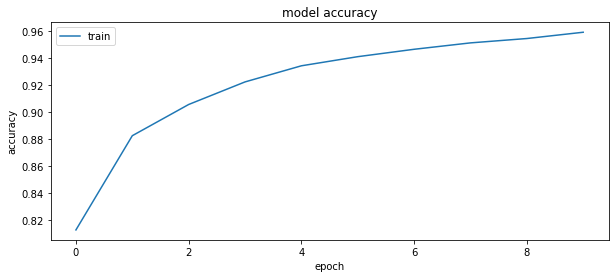

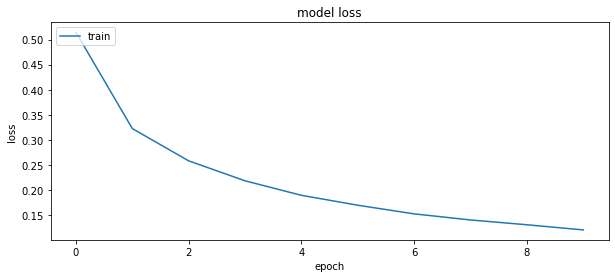

In [153]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Αccuracy and prediction scores

In [154]:
y_pred = model.predict(testX, batch_size=1000)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 

print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.99      0.88      0.94     18118
           1       0.27      0.85      0.41       556
           2       0.77      0.93      0.85      1448
           3       0.27      0.91      0.42       162
           4       0.91      0.98      0.94      1608

    accuracy                           0.89     21892
   macro avg       0.64      0.91      0.71     21892
weighted avg       0.95      0.89      0.91     21892



## Interpretation: 

1. By performing classical ML model on given DataSet, I have performed PCA analysis for feature extraction. PCA allows to compress our data and
reduce the number of dimensions with PCA i could achieve 41 relevant features to proceed further with classical Decision Tree classification.
this approach enabled to achieve 83% accuracy on a DataSet.


2. Based on the further EDA i could identify class imbalance in the target categorical data with repect to feature samples please refer the Count plot for this.
so this may require upsampling or downsampling to synthesize the data.


3. I performed SMOTE(synthetic minority oversampling technique)Using SMOTE oversampling, the performance of Logistic 
Regression declined, however Random Forest classifier improved with the acuuracy of 98% specially for the minority classes.
so the conclusion here is with the test data the data set was showing the chances of overfitting. Hence as part of improving the model i went with the CNN Deep learning neural network.


4. The chances of overfitting is very less due to Fully connected neural network of Deep learning CNN model 
where the accuracy is 89% 


## Refernces-

1. https://www.researchgate.net/publication/280462158_Classification_of_ECG_signals_using_machine_learning_techniques_A_survey
2. https://www.cinc.org/archives/2020/pdf/CinC2020-227.pdf    